# ibadan property market overview

comprehensive analysis of property prices and market dynamics across ibadan neighborhoods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# set clean styling
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# load data
df = pd.read_csv('../data/ibadan_housing_prices.csv')
print(f"loaded {len(df):,} property records")

loaded 2,000 property records


## market size and composition

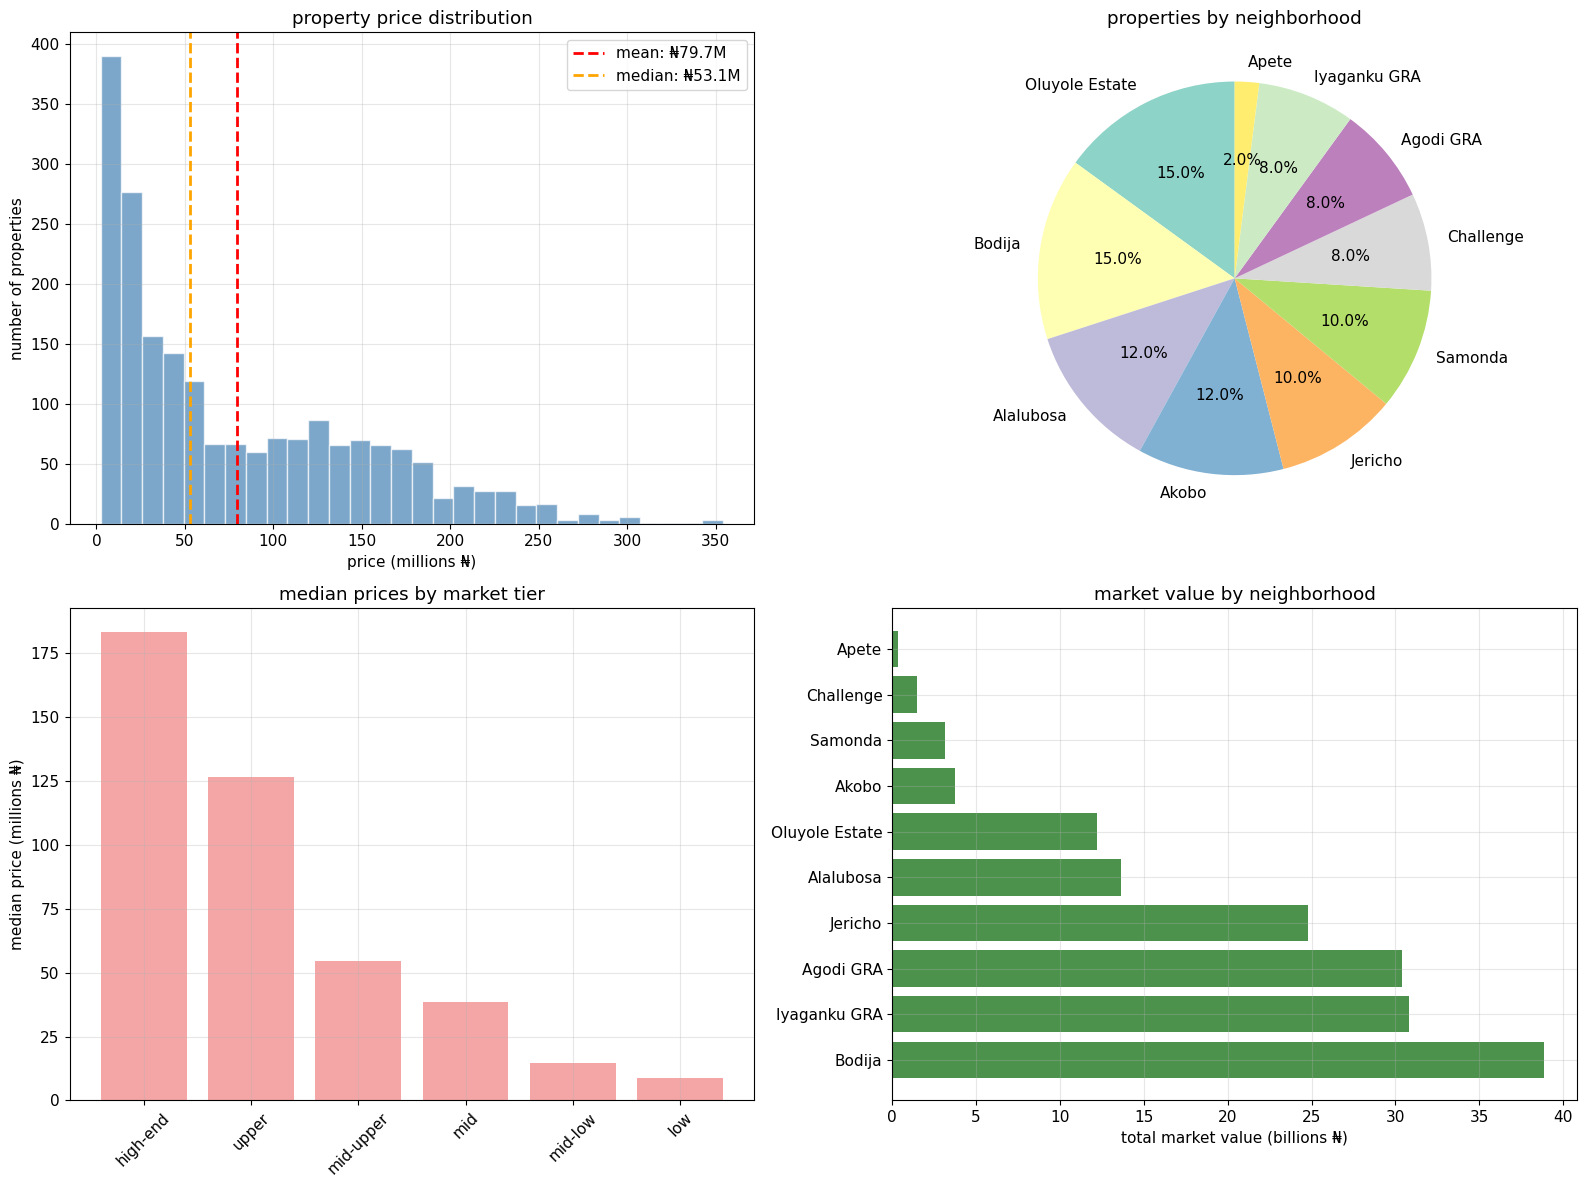


market overview:
  total properties: 2,000
  total market value: ₦159.5B
  average price: ₦79.7M
  median price: ₦53.1M


In [2]:
# market overview metrics
total_properties = len(df)
total_market_value = df['price_naira'].sum()
avg_price = df['price_naira'].mean()
median_price = df['price_naira'].median()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# market summary cards
summary_data = {
    'total properties': f"{total_properties:,}",
    'total market value': f"₦{total_market_value/1e9:.1f}B",
    'average price': f"₦{avg_price/1e6:.1f}M",
    'median price': f"₦{median_price/1e6:.1f}M"
}

# price distribution
axes[0,0].hist(df['price_naira']/1e6, bins=30, alpha=0.7, color='steelblue', edgecolor='white')
axes[0,0].axvline(avg_price/1e6, color='red', linestyle='--', linewidth=2, label=f'mean: ₦{avg_price/1e6:.1f}M')
axes[0,0].axvline(median_price/1e6, color='orange', linestyle='--', linewidth=2, label=f'median: ₦{median_price/1e6:.1f}M')
axes[0,0].set_xlabel('price (millions ₦)')
axes[0,0].set_ylabel('number of properties')
axes[0,0].set_title('property price distribution')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# properties by neighborhood
location_counts = df['location'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(location_counts)))
wedges, texts, autotexts = axes[0,1].pie(location_counts.values, labels=location_counts.index, 
                                        autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,1].set_title('properties by neighborhood')

# price ranges by tier
tier_mapping = {
    'Agodi GRA': 'high-end', 'Iyaganku GRA': 'high-end', 'Jericho': 'upper', 'Bodija': 'upper',
    'Alalubosa': 'mid-upper', 'Oluyole Estate': 'mid', 'Akobo': 'mid-low', 'Samonda': 'mid-low',
    'Challenge': 'low', 'Apete': 'low'
}
df['tier'] = df['location'].map(tier_mapping)

tier_stats = df.groupby('tier')['price_naira'].agg(['count', 'mean', 'median']).round(0)
tier_stats = tier_stats.sort_values('median', ascending=False)

x_pos = np.arange(len(tier_stats))
axes[1,0].bar(x_pos, tier_stats['median']/1e6, alpha=0.7, color='lightcoral')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(tier_stats.index, rotation=45)
axes[1,0].set_ylabel('median price (millions ₦)')
axes[1,0].set_title('median prices by market tier')
axes[1,0].grid(True, alpha=0.3)

# market value distribution
market_value_by_location = df.groupby('location')['price_naira'].sum().sort_values(ascending=False)
axes[1,1].barh(range(len(market_value_by_location)), market_value_by_location.values/1e9, 
               color='darkgreen', alpha=0.7)
axes[1,1].set_yticks(range(len(market_value_by_location)))
axes[1,1].set_yticklabels(market_value_by_location.index)
axes[1,1].set_xlabel('total market value (billions ₦)')
axes[1,1].set_title('market value by neighborhood')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# print summary
print("\nmarket overview:")
for key, value in summary_data.items():
    print(f"  {key}: {value}")

## neighborhood price analysis

In [ ]:
# detailed neighborhood analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# price distribution by neighborhood (violin plot)
locations_ordered = df.groupby('location')['price_naira'].median().sort_values(ascending=False).index
df_ordered = df.set_index('location').loc[locations_ordered].reset_index()

sns.violinplot(data=df_ordered, x='location', y='price_naira', ax=axes[0,0])
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,0].set_ylabel('price (₦)')
axes[0,0].set_title('price distribution by neighborhood')
axes[0,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'₦{x/1e6:.0f}M'))

# price statistics table
price_stats = df.groupby('location')['price_naira'].agg([
    'count', 'min', 'mean', 'median', 'max'
]).round(0)
price_stats = price_stats.sort_values('median', ascending=False)

# convert to millions for readability
for col in ['min', 'mean', 'median', 'max']:
    price_stats[f'{col}_millions'] = price_stats[col] / 1e6

# heatmap of price statistics
heatmap_data = price_stats[['min_millions', 'mean_millions', 'median_millions', 'max_millions']]
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0,1])
axes[0,1].set_title('price statistics by neighborhood (millions ₦)')
axes[0,1].set_xlabel('price metrics')

# price per square meter analysis
df['price_per_sqm'] = df['price_naira'] / df['area_sqm']
price_per_sqm_stats = df.groupby('location')['price_per_sqm'].median().sort_values(ascending=False)

axes[1,0].bar(range(len(price_per_sqm_stats)), price_per_sqm_stats.values/1000, 
              color='purple', alpha=0.7)
axes[1,0].set_xticks(range(len(price_per_sqm_stats)))
axes[1,0].set_xticklabels(price_per_sqm_stats.index, rotation=45, ha='right')
axes[1,0].set_ylabel('price per sqm (thousands ₦)')
axes[1,0].set_title('median price per square meter')
axes[1,0].grid(True, alpha=0.3)

# neighborhood desirability vs price
location_summary = df.groupby('location').agg({
    'price_naira': 'median',
    'desirability_score': 'first',
    'neighborhood_prestige': 'first'
}).reset_index()

scatter = axes[1,1].scatter(location_summary['desirability_score'], 
                           location_summary['price_naira']/1e6,
                           s=100, alpha=0.7, c=location_summary['neighborhood_prestige'], 
                           cmap='viridis')

for i, location in enumerate(location_summary['location']):
    axes[1,1].annotate(location, 
                      (location_summary.iloc[i]['desirability_score'], 
                       location_summary.iloc[i]['price_naira']/1e6),
                      xytext=(5, 5), textcoords='offset points', fontsize=9)

axes[1,1].set_xlabel('desirability score')
axes[1,1].set_ylabel('median price (millions ₦)')
axes[1,1].set_title('desirability vs median price')
axes[1,1].grid(True, alpha=0.3)

plt.colorbar(scatter, ax=axes[1,1], label='neighborhood prestige')
plt.tight_layout()
plt.show()

# print neighborhood rankings
print("\nneighborhood price rankings:")
for i, (location, price) in enumerate(price_stats['median'].items(), 1):
    print(f"  {i:2d}. {location}: ₦{price/1e6:.1f}M")

## property characteristics analysis

In [ ]:
# property characteristics and their impact on price
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# house type distribution and prices
house_type_stats = df.groupby('house_type').agg({
    'price_naira': ['count', 'median'],
    'area_sqm': 'median'
}).round(0)
house_type_stats.columns = ['count', 'median_price', 'median_area']
house_type_stats = house_type_stats.sort_values('median_price', ascending=False)

# house type counts
axes[0,0].pie(house_type_stats['count'], labels=house_type_stats.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('property types distribution')

# median price by house type
axes[0,1].bar(range(len(house_type_stats)), house_type_stats['median_price']/1e6, 
              color='lightblue', alpha=0.8)
axes[0,1].set_xticks(range(len(house_type_stats)))
axes[0,1].set_xticklabels(house_type_stats.index, rotation=45, ha='right')
axes[0,1].set_ylabel('median price (millions ₦)')
axes[0,1].set_title('median price by property type')
axes[0,1].grid(True, alpha=0.3)

# area vs price relationship
axes[0,2].scatter(df['area_sqm'], df['price_naira']/1e6, alpha=0.6, s=30)
axes[0,2].set_xlabel('area (sqm)')
axes[0,2].set_ylabel('price (millions ₦)')
axes[0,2].set_title('area vs price relationship')
axes[0,2].grid(True, alpha=0.3)

# add trend line
z = np.polyfit(df['area_sqm'], df['price_naira']/1e6, 1)
p = np.poly1d(z)
axes[0,2].plot(df['area_sqm'], p(df['area_sqm']), "r--", alpha=0.8, linewidth=2)

# bedrooms impact on price
bedroom_stats = df.groupby('bedrooms')['price_naira'].median().sort_index()
axes[1,0].bar(bedroom_stats.index, bedroom_stats.values/1e6, color='salmon', alpha=0.8)
axes[1,0].set_xlabel('number of bedrooms')
axes[1,0].set_ylabel('median price (millions ₦)')
axes[1,0].set_title('price by number of bedrooms')
axes[1,0].grid(True, alpha=0.3)

# condition impact on price
condition_order = ['Old', 'Renovated', 'New']
condition_stats = df.groupby('condition')['price_naira'].median().reindex(condition_order)
colors = ['lightcoral', 'gold', 'lightgreen']
axes[1,1].bar(range(len(condition_stats)), condition_stats.values/1e6, color=colors, alpha=0.8)
axes[1,1].set_xticks(range(len(condition_stats)))
axes[1,1].set_xticklabels(condition_stats.index)
axes[1,1].set_ylabel('median price (millions ₦)')
axes[1,1].set_title('price by property condition')
axes[1,1].grid(True, alpha=0.3)

# furnishing impact on price
furnishing_order = ['Unfurnished', 'Semi-Furnished', 'Furnished']
furnishing_stats = df.groupby('furnishing')['price_naira'].median().reindex(furnishing_order)
axes[1,2].bar(range(len(furnishing_stats)), furnishing_stats.values/1e6, 
              color='mediumpurple', alpha=0.8)
axes[1,2].set_xticks(range(len(furnishing_stats)))
axes[1,2].set_xticklabels(furnishing_stats.index, rotation=45, ha='right')
axes[1,2].set_ylabel('median price (millions ₦)')
axes[1,2].set_title('price by furnishing level')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# correlation analysis
numeric_features = ['area_sqm', 'bedrooms', 'bathrooms', 'parking_spaces', 
                   'security_rating', 'infrastructure_quality', 'desirability_score']
correlation_with_price = df[numeric_features + ['price_naira']].corr()['price_naira'].sort_values(ascending=False)

print("\nfeature correlation with price:")
for feature, corr in correlation_with_price.items():
    if feature != 'price_naira':
        print(f"  {feature}: {corr:.3f}")

## geographic and infrastructure analysis

In [ ]:
# geographic and infrastructure impact analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# geographic distribution of properties
scatter = axes[0,0].scatter(df['longitude'], df['latitude'], 
                           c=df['price_naira']/1e6, cmap='viridis', 
                           s=50, alpha=0.7)
axes[0,0].set_xlabel('longitude')
axes[0,0].set_ylabel('latitude')
axes[0,0].set_title('property locations colored by price')
plt.colorbar(scatter, ax=axes[0,0], label='price (millions ₦)')

# distance to city center vs price
axes[0,1].scatter(df['distance_to_city_center_km'], df['price_naira']/1e6, 
                 alpha=0.6, s=30, color='orange')
axes[0,1].set_xlabel('distance to city center (km)')
axes[0,1].set_ylabel('price (millions ₦)')
axes[0,1].set_title('distance vs price relationship')
axes[0,1].grid(True, alpha=0.3)

# add trend line
z = np.polyfit(df['distance_to_city_center_km'], df['price_naira']/1e6, 1)
p = np.poly1d(z)
axes[0,1].plot(df['distance_to_city_center_km'], p(df['distance_to_city_center_km']), 
               "r--", alpha=0.8, linewidth=2)

# infrastructure quality distribution
quality_features = ['security_rating', 'infrastructure_quality', 
                   'electricity_stability', 'water_supply']

quality_data = df[quality_features].mean().sort_values(ascending=False)
axes[1,0].bar(range(len(quality_data)), quality_data.values, 
              color=['red', 'blue', 'green', 'purple'], alpha=0.7)
axes[1,0].set_xticks(range(len(quality_data)))
axes[1,0].set_xticklabels([name.replace('_', ' ') for name in quality_data.index], 
                         rotation=45, ha='right')
axes[1,0].set_ylabel('average rating')
axes[1,0].set_title('average infrastructure quality ratings')
axes[1,0].grid(True, alpha=0.3)

# quality vs price heatmap by neighborhood
quality_by_location = df.groupby('location')[quality_features].mean()
quality_by_location = quality_by_location.loc[locations_ordered]  # order by price

sns.heatmap(quality_by_location.T, annot=True, fmt='.1f', cmap='RdYlGn', 
            ax=axes[1,1], cbar_kws={'label': 'rating'})
axes[1,1].set_title('infrastructure quality by neighborhood')
axes[1,1].set_xlabel('neighborhood')
axes[1,1].set_ylabel('quality metrics')

plt.tight_layout()
plt.show()

# infrastructure impact summary
print("\ninfrastructure impact on price:")
for feature in quality_features:
    corr = df[feature].corr(df['price_naira'])
    avg_rating = df[feature].mean()
    print(f"  {feature.replace('_', ' ')}: correlation {corr:.3f}, average rating {avg_rating:.1f}")

## market insights summary

In [ ]:
# key market insights
print("key market insights:")
print("\n1. market structure:")
print(f"   - total properties analyzed: {total_properties:,}")
print(f"   - total market value: ₦{total_market_value/1e9:.1f} billion")
print(f"   - price range: ₦{df['price_naira'].min()/1e6:.1f}M to ₦{df['price_naira'].max()/1e6:.1f}M")

print("\n2. neighborhood tiers:")
tier_summary = df.groupby('tier')['price_naira'].agg(['count', 'median']).sort_values('median', ascending=False)
for tier, data in tier_summary.iterrows():
    print(f"   - {tier}: {data['count']} properties, median ₦{data['median']/1e6:.1f}M")

print("\n3. property characteristics:")
print(f"   - most common type: {df['house_type'].mode()[0]} ({df['house_type'].value_counts().iloc[0]} properties)")
print(f"   - average area: {df['area_sqm'].mean():.0f} sqm")
print(f"   - average bedrooms: {df['bedrooms'].mean():.1f}")

print("\n4. price drivers:")
top_correlations = correlation_with_price.head(4)
for feature, corr in top_correlations.items():
    if feature != 'price_naira':
        print(f"   - {feature.replace('_', ' ')}: {corr:.3f} correlation")

print("\n5. geographic patterns:")
distance_corr = df['distance_to_city_center_km'].corr(df['price_naira'])
print(f"   - distance to center correlation: {distance_corr:.3f}")
print(f"   - closest to center: {df.loc[df['distance_to_city_center_km'].idxmin(), 'location']}")
print(f"   - furthest from center: {df.loc[df['distance_to_city_center_km'].idxmax(), 'location']}")

print("\n6. investment insights:")
best_value = price_per_sqm_stats.idxmin()
premium_location = price_per_sqm_stats.idxmax()
print(f"   - best value per sqm: {best_value} (₦{price_per_sqm_stats[best_value]/1000:.0f}k/sqm)")
print(f"   - premium location: {premium_location} (₦{price_per_sqm_stats[premium_location]/1000:.0f}k/sqm)")

# data quality summary
outliers = df['is_outlier'].sum()
outlier_pct = (outliers / len(df)) * 100
print(f"\n7. data quality:")
print(f"   - outliers: {outliers} properties ({outlier_pct:.2f}%)")
print(f"   - data completeness: high quality synthetic data")
print(f"   - price validation: all prices within realistic market ranges")